# Домашнее задание к занятию «Поиск выбросов и генерация новых признаков» 


## Задание
##### Цель: Изучить применение методов по поиску выбросов в данных, попрактиковаться в обработке экстремальных значений.
##### Описание задания:
В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с [сайта](https://www.kaggle.com/uciml/glass). Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

## Этапы работы:

In [167]:
import numpy as np
import pandas as pd

In [168]:
import warnings
warnings.filterwarnings('ignore')

### 1. Получите данные и загрузите их в рабочую среду

In [169]:
my_path = r"C:\Users\sveta\Documents\Netology\ML\glass.csv"
data = pd.read_csv(my_path)
data.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


### 2. Проведите первичный анализ

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Количество экземпляров: 214

Количество атрибутов: 10

Attribute Information:

Id number: 1 to 214 (removed from CSV file)

1. RI: refractive index
2. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
3. Mg: Magnesium
4. Al: Aluminum
5. Si: Silicon
6. K: Potassium
7. Ca: Calcium
8. Ba: Barium
9. Fe: Iron
10. Type of glass: (class attribute)
    - 1 building_windows_float_processed
    - 2 building_windows_non_float_processed
    - 3 vehicle_windows_float_processed
    - 4 vehicle_windows_non_float_processed (none in this database)
    - 5 containers
    - 6 tableware
    - 7 headlamps

#### а) Проверьте количество записей для каждого класса. Сделайте вывод

In [171]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

<AxesSubplot:>

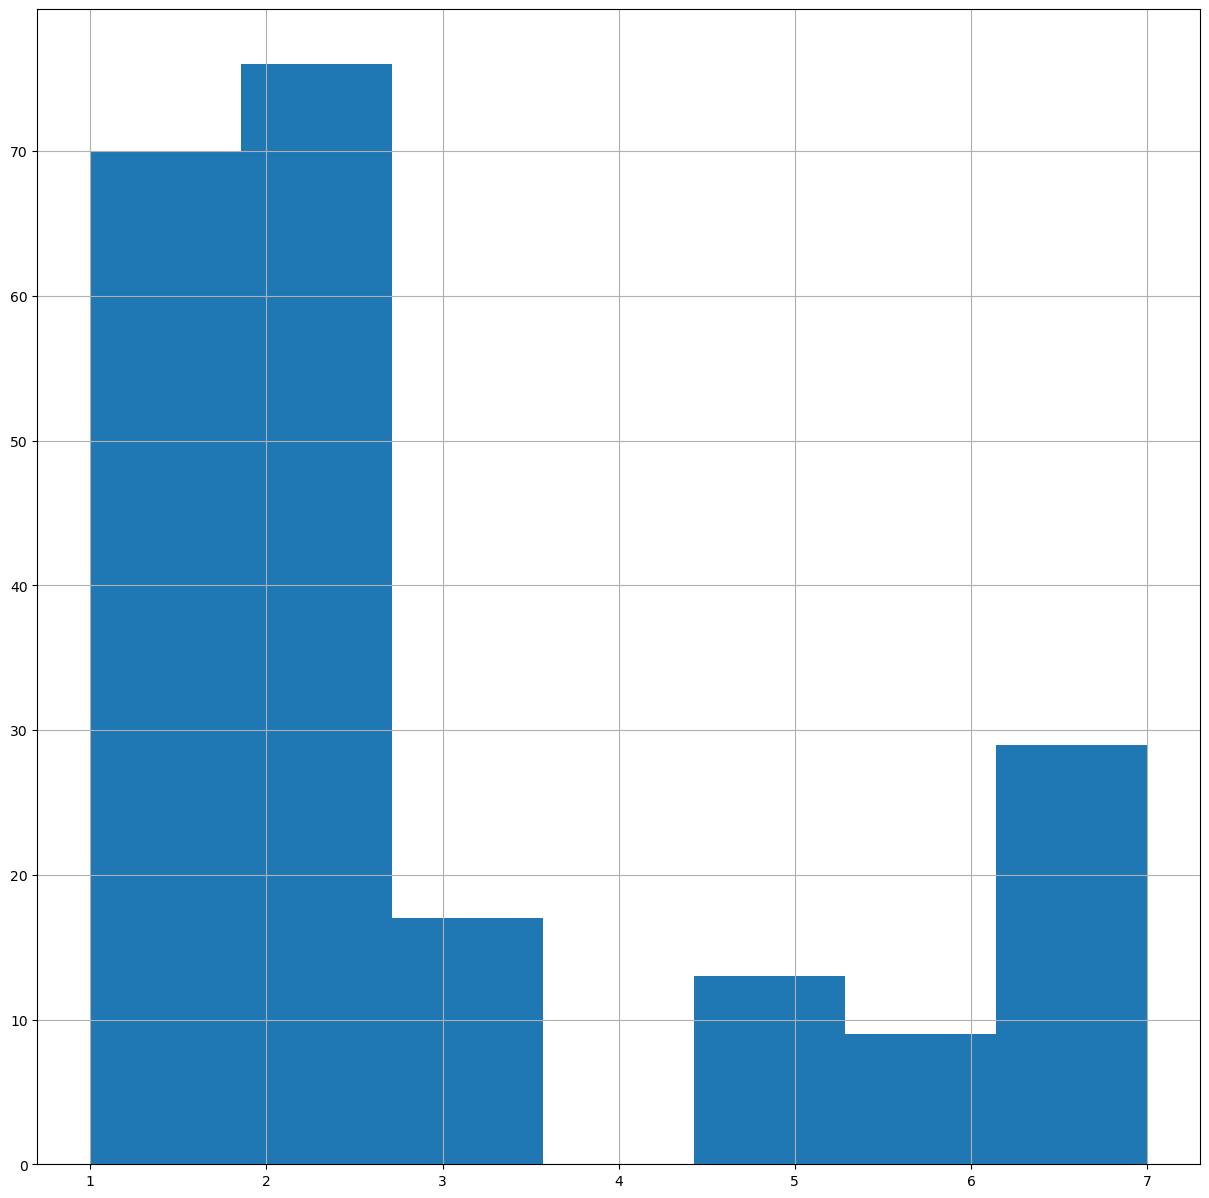

In [172]:
data['Type'].hist(figsize=(15, 15), bins=7)

Классы распределены неравномерно:

    - 1 и 2 классы знаитьельно больше остальных;
    - 4 класс вообще отсутствует 

### 3. Разделите выборку на обучающее и тестовое подмножество 
80% данных оставить на обучающее множество, 20% на тестовое.

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
X = data[['RI', 'Na','Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
y = data[['Type']]

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве

In [176]:
from sklearn.ensemble import RandomForestClassifier

In [177]:
clf = RandomForestClassifier(random_state=41)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=41)

### 5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy)

In [178]:
from sklearn.metrics import accuracy_score

In [179]:
rfc_pred = clf.predict(X_test)
accuracy_score(y_test, rfc_pred)

0.6046511627906976

### 6. Обработайте выбросы в данных

In [180]:
from sklearn import preprocessing
import matplotlib.pyplot as plt

#### а) Визуализируйте распределение значений для каждой переменной. 
Можно использовать функции sns.boxplot, sns.distplot. 

In [181]:
from pylab import *
import seaborn as sns

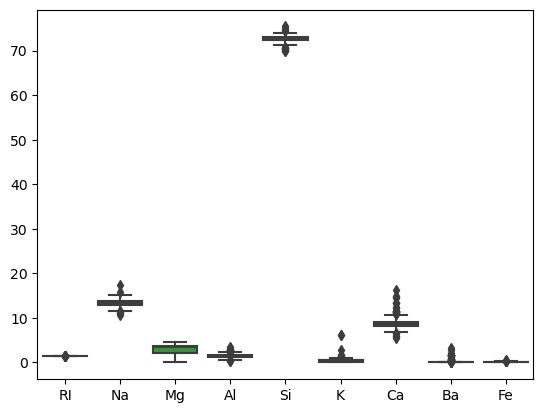

In [182]:
sns.boxplot(data=X)
plt.show()

#### b) Исследуйте признаки на выбросы несколькими способами

array([[<AxesSubplot:title={'center':'RI'}>,
        <AxesSubplot:title={'center':'Na'}>,
        <AxesSubplot:title={'center':'Mg'}>],
       [<AxesSubplot:title={'center':'Al'}>,
        <AxesSubplot:title={'center':'Si'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'Ca'}>,
        <AxesSubplot:title={'center':'Ba'}>,
        <AxesSubplot:title={'center':'Fe'}>]], dtype=object)

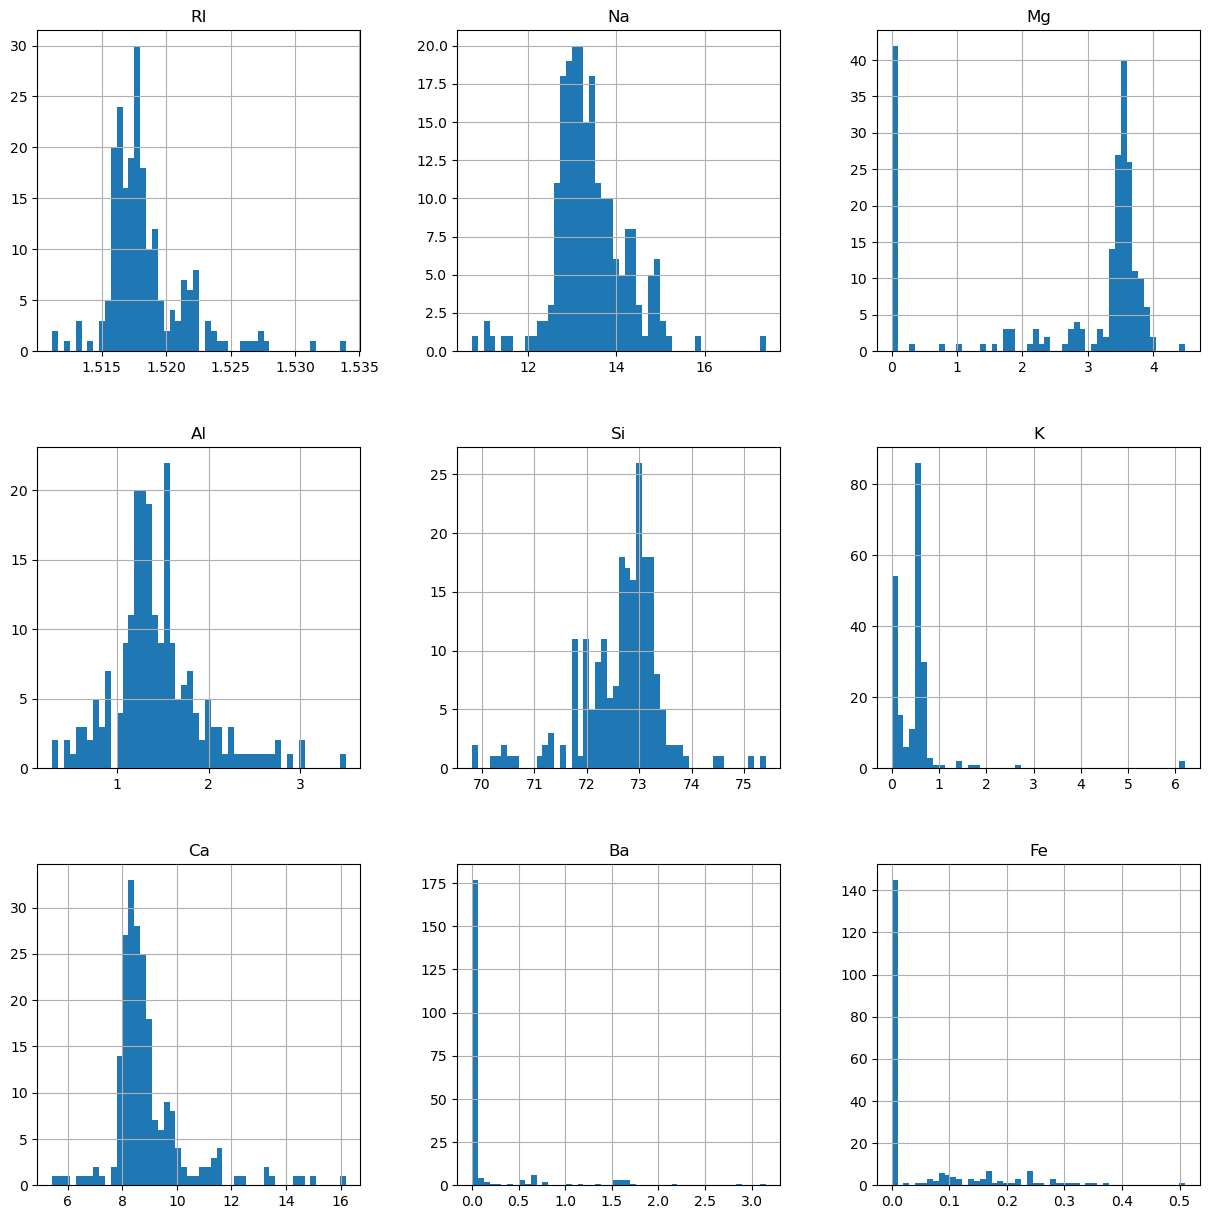

In [183]:
X.hist(figsize=(15, 15), bins=50)

Есть ли признаки с нормальным распределением?

Распределение каждого признака, кроме Ba, стремится к нормальному, однако:
- сильные выбросы присутствуют в переменных: Na, K, Ca, Fe
- у Mg почти двумодальное распределение
- RI, Al, Si - несимметричны

#### c) Удалите выбросы
Воспользуемся правилом трех сигм:

In [184]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

new_data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5* IQR))).any(axis=1)]

In [185]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 181
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      136 non-null    float64
 1   Na      136 non-null    float64
 2   Mg      136 non-null    float64
 3   Al      136 non-null    float64
 4   Si      136 non-null    float64
 5   K       136 non-null    float64
 6   Ca      136 non-null    float64
 7   Ba      136 non-null    float64
 8   Fe      136 non-null    float64
 9   Type    136 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 11.7 KB


In [186]:
print(f'Выбросов: { data.shape[0] - new_data.shape[0]} строк(и)')

Выбросов: 78 строк(и)


In [187]:
new_data.shape[0] * 100 / data.shape[0]

63.55140186915888

##### Осталось слишком мало данных, стоит увеличить коэффициент 

In [188]:
new_data = data[~((data < (Q1 - 2.5 * IQR)) |(data > (Q3 + 2.5 * IQR))).any(axis=1)]

print(f'Выбросов: { data.shape[0] - new_data.shape[0]} строк(и)')
new_data.shape[0] * 100 / data.shape[0]

Выбросов: 57 строк(и)


73.3644859813084

In [189]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 187
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      157 non-null    float64
 1   Na      157 non-null    float64
 2   Mg      157 non-null    float64
 3   Al      157 non-null    float64
 4   Si      157 non-null    float64
 5   K       157 non-null    float64
 6   Ca      157 non-null    float64
 7   Ba      157 non-null    float64
 8   Fe      157 non-null    float64
 9   Type    157 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 13.5 KB


### 7. Повторите п. 4, п. 5.

In [190]:
X_1 = new_data[['RI', 'Na','Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
y_1 = new_data[['Type']]

In [191]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=0)

In [192]:
clf_1 = RandomForestClassifier(random_state=41)
clf_1.fit(X_train_1, y_train_1)

RandomForestClassifier(random_state=41)

In [193]:
rfc_pred_1 = clf_1.predict(X_test_1)
accuracy_score(y_test_1, rfc_pred_1)

0.84375

### 8. Сформулируйте выводы по проделанной работе

В данной работе были обучены 2 модели дерева решений RandomForestClassifier. Первая обучалась на данных с выбросами, вторая - на отфильтрованных. 

#### а) Кратко опишите, какие преобразования были сделаны с данными

Для второй модели исходная выборка признаков была разделена на квартили, значения, выходящие за рамки правила 3-ех сигм с коэффициентом 2.5 были удалены.


#### b) Сравните точность двух моделей

Уменьшение выборки позволило более точно описать "средний случай". Точность новой модели составила ~ 84%, что на 24% больше, чем у первой (~ 60%).

#### c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

Удаление выбросных значений в признаках позволяет значительно повысить качество модели.

Явный недостаток - потеря данных, в нашем случае это 26% от изначального датафрейма. Такое уменьшение может искажать распределение данных.

Дополнительной сложностью при удалении выбросов, является подброр правильных пороговых значений. Неправильный выбор коэффициента для правила 3-ех сигм может привести к удалению значимых данных или сохранению выбросов.

Результат:
Получены практические знания по работе с выбросами в данных.